In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 多項式特徴量を追加する

$x_2 = (x_1)^2$を特徴量として追加することで，分離可能に

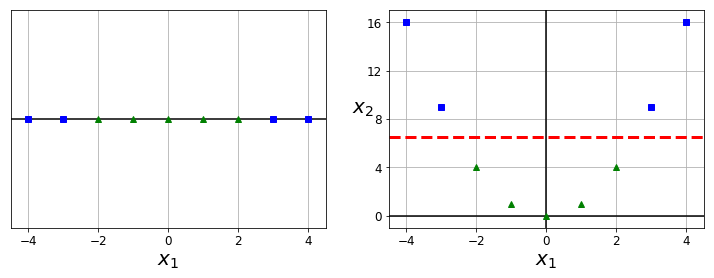

In [6]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
# grid
plt.grid(True, which='both')
# y=0軸
plt.axhline(y=0, color='k')
# sample
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
# 空配列を渡して，y軸の値を消す
plt.gca().get_yaxis().set_ticks([])
# ラベル
plt.xlabel(r"$x_1$", fontsize=20)
# グラフの範囲
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
# grid
plt.grid(True, which='both')
# 軸
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# サンプル
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
# ラベル
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
# 描画するy値を限定
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
# 線形分離できそうな線
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
# っjjグラフの範囲
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

## scikit-learnで実装

make moons

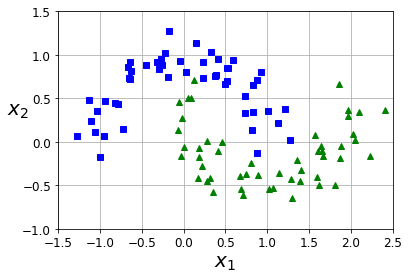

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

方針:  
+ 多項式に変換（PolynomialFeatures）
+ スケールの統一
+ LinearSVC

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42)),
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

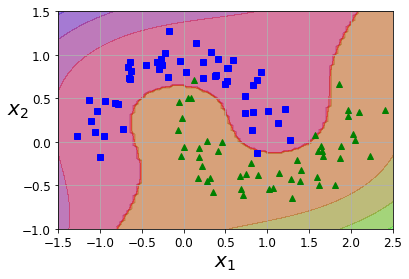

In [18]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    # 予測したクラスの描画
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    # クラススコアの描画
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.4)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# カーネルトリック

上記の多項式特徴量を追加する方法は，あらゆる種類の機械学習アルゴリズムで素晴らしく機能するが下記の問題がある，  
+ 次数が低いと非常に複雑なデータセットを処理できない
+ 次数が高いと特徴量が膨大になってモデルが遅くなりすぎる

そこでSVMを使う場合は，**カーネルトリック**というほとんど奇跡的なテクニックによって**実際に特徴量を追加することなく**あたかも追加したかのような結果を得ることができる．

これにより，特徴量の組合せ爆発なども起こらない

## 多項式カーネル

$K_{degree}(u, v) = (coef0 + \gamma u^Tv)^{degree}$

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5)),
])
poly_kernel_svm_clf.fit(X, y)

次元数を増やしたパターン

In [22]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

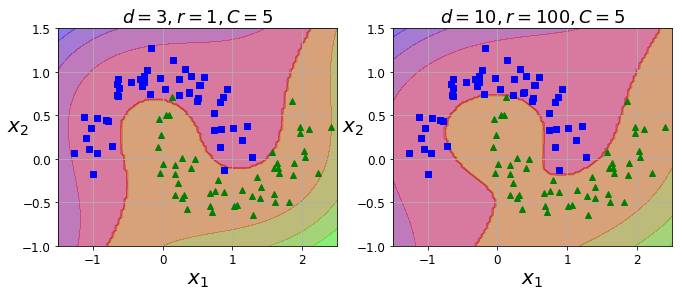

In [27]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

左図は３次元多項式カーネル，右図は１０次元多項式カーネル．  
右の方が当然過学習を起こしている．  
また，ハイパーパラメータcoef0でモデルからどの程度影響を認めるかを調整する．

**基本的にハイパーパラメータを決めるときはグリッドサーチを使う．ただしパラメータの意味を理解しておくとさらに正しいサーチができる**

## 類似度特徴量（ガウス放射基底関数）

いわゆる類似性特徴量．  
ランドマークとの類似度を新特徴量とする．

ランドマーク$u$とインスタンス$v$との距離  
$K_{\sigma}(u, v) = exp(-\frac{1}{2\sigma^2}||u-v||^2)$, ($\gamma = \frac{1}{2\sigma^2}$)

In [28]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

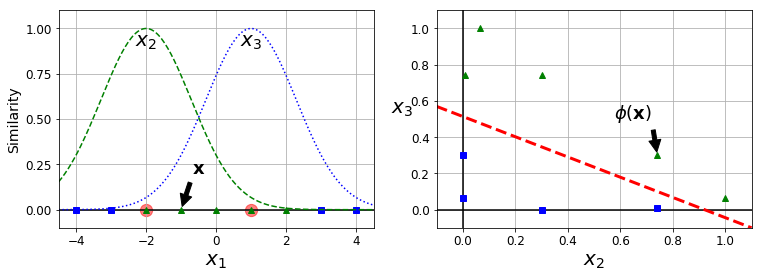

In [29]:
gamma = 0.3

landmark = [-2, 1]
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, landmark[0], gamma)
x3s = gaussian_rbf(x1s, landmark[1], gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

ランドマークを-2, 1とする．  
左図は，それぞれのランドマークとのRBFで定義される類似度を示す．$x$はあるインスタンスである．  
右図はそれぞれのランドマークとの類似度を新特徴量としてプロットしたもの，線形分離可能であることがわかる．

In [30]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


ではランドマークはどう決める？？  
最も簡単なアプローチは，個々のインスタンスの位置にランドマークを作ること．そうすることによって特徴量の数だけ次元数が増えるため，線形分離の可能が広がる．  
ただし，訓練セットが非常に多い場合，特徴量数も多くなってしまうことに注意．  
それにより計算コストも膨大になってしまう．

## RBFカーネル（radial basis function）（動径基底カーネル）

実際に類似性特徴量を追加しなくても，あたかも追加したのと同じ結果が得られる．

ちなみにガウス分布の関数系でもあるため，ガウシアンカーネルとも呼ばれる．

In [31]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

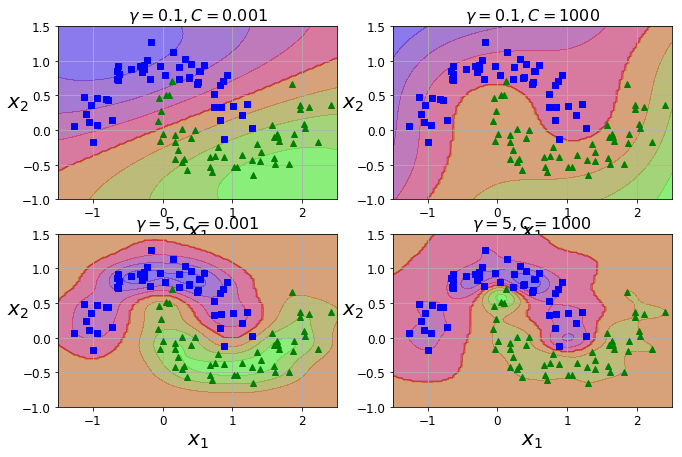

In [33]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

$\gamma$が大きくなると，expの中の類似度関数の負値が急激になる=ベル型が細くなるなるので，各インスタンスをランドマークと置いた時に，各インスタンスの類似度の影響を受けづらくなる．その結果，本当に近いインスタンスの影響しか受けなくなるので，決定境界は不規則になりクネクネする．  
反対に，$\gamma$が小さくなると，様々なインスタンスの影響を受けるので，決定境界は滑らかになる．  
つまり$\gamma$は，正則化パラメータとしても機能する．  
また当然，$C$も，**$\gamma$の特徴の中で，**正則化パラメータとして機能する

# 結局カーネルトリックってなに？

多項式カーネルやRBFカーネルでやっているのは，新特徴量によって次元数を増やすことによって，線形分離可能な座標にインスタンスを変換することだ．  
多項式カーネルならば多次元特徴量にに，RBFカーネルでは類似度特徴量に変換している． 

ここでSVMでカーネルを使う大前提として重要なのが，  
**SVMは最適化問題の双対形式が特徴量の内積で表される**（ラグランジュ未定乗数法などで導かれる）

したがって一般的な思考では「新特徴量に変換」→「内積」の手順を踏むが，その場合計算量が膨大になる．

そこで，「新特徴量に変換」→「内積」までの計算をもっと簡単な計算で実現可能な別アプローチを考えたい．  
そこで利用されるのがカーネルトリック

例えば，２次元多項式変換は，  
$\phi(x_1, x_2) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)$で表され，  
$a = (a_1, a_2), b = (b_1, b_2)の時$  
$\phi(a)^T\cdot \phi(b) = a_1^2b_1^2+2a_1b_1a_2b_2+a_2^2b_2^2 = (a_1b_1+a_2b_2)^2 = (a^T\cdot b)^2$  
となるため，単純に元の特徴量の内積を２乗するだけで良い．  
そして，このようなトリックが使えるカーネルは複数存在する．

新特徴量への変換方式だけ抑えておいて，どのカーネルを使うかを決めよう．

# まとめ

選べるカーネルがたくさんあるが，
+ 訓練セットや特徴量が膨大である場合は，まず線形カーネルを選びたい．
    + その際は，SVC(kernel='svc')よりも，LinearSVCの方が**はるかに**高速であることを覚えておきたい．
+ 訓練セットがそこまで多くないときは，RBFカーネルも良い．ほとんどの場合でうまく機能する
+ 時間と計算能力に余裕があれば，交差検証とグリッドサーチをしよう．

| クラス         | 計算量                   | アウトオブコアサポート | スケーリング | カーネルトリック |
|----------------|--------------------------|------------------------|--------------|------------------|
| LinearSVC      | O(m×n)                   | なし                   | 必要         | なし             |
| SGDClassifiler | O>(m*n)                  | あり                   | 必要         | なし             |
| SVC            | O(m^2×n)からO(m^3×n)の間 | なし                   | 必要         | あり             |

LinearSVCの計算量は訓練セットの数に線形にスケーリングするが，SVCは非常に遅くなる．